In [1]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\cq671\\OneDrive\\Documentos\\hospitalizacion_pediatrica\\utils.py'>

In [3]:

# Estos son los datos ya procesados, listos para los análisis del proyecto

#carga de datos
canasta = utils.cargar_datos('fuentes/canasta.json')
stores =  utils.cargar_datos('fuentes/tiendas_privadas.json')
tienda_online = utils.cargar_datos('fuentes/tienda_online_supermarket23.json')
datos_onei = utils.cargar_datos('fuentes/datos_onei.json')
tasa_informal = utils.cargar_datos('fuentes/tasa_informal.json')

len_de_muestra = len(stores)
conversion_usd_cup = tasa_informal[4]["tasa_usd_cup"] # tasa de cambio que se va a aplicar a los precios de los productos de la tienda online

jugos_estandarizados = utils.estandarizar_jugos_a_200ml(stores)
salario_medio = datos_onei["indicators"][0]["value"]

tienda_online_cup = utils.convertir_usd_a_cup(tienda_online,conversion_usd_cup)

productos_categoria = utils.agrupar_productos_por_categoria(stores)

precios_estandarizados_mipymes = utils.estandarizar_precios_unidad_modal(productos_categoria, canasta)
precios_estandarizados_tienda_online = utils.estandarizar_precios_unidad_modal(tienda_online_cup, canasta)

precio_mediano_mipymes = utils.calcular_precio_mediano_por_categoria(precios_estandarizados_mipymes)
precio_mediano_tienda_online = utils.calcular_precio_mediano_por_categoria(precios_estandarizados_tienda_online)


origen_categorias = utils.conteo_origen(stores)
nombre_categorias =utils.nombre_categorias(canasta)



# EL impacto económico de una hospitalización pediátrica en La Habana.

La hospitalización de un niño no es solo un evento médico, sino también un desafío que pone a prueba la capacidad de las familias cubanas. Mientras el sistema de salud garantiza la atención, las necesidades cotidianas del paciente recaen enteramente en sus cuidadores, quienes deben enfrentar precios de mercado que contrastan drásticamente con sus ingresos formales.
Este análisis, basado principalmenete en datos del mercado minorista de La Habana, pretende cuantificar esa brecha y revela cómo una emergencia de salud expone tensiones estructurales de la economía cubana.


---

## Datos oficiales versus realidad de mercado

Según datos del Anuario Estadístico del 2023 de la ONEI, el salario promedio en La Habana es de 5354 CUP. Sin embargo, la realidad del mercado muestra una situación muy distinta: **solo la canasta básica semanal para un niño hospitalizado tiene un costo estimado de 25416 CUP en comercios privados**. Esto significa que lo que una persona gana en todo un mes no alcanza ni para cubrir los gastos de una sola semana de hospitalización. Esta enorme brecha entre lo que se gana y lo que se necesita gastar expone una contradicción fundamental en la economía cotidiana de las familias cubanas.

Al comparar los precios entre diferentes tipos de comercio, encontramos que en las tiendas privadas la canasta cuesta 31291 CUP, mientras que en tiendas online como Super Market 23  ronda los 34000 CUP. Aunque hay una diferencia significativa entre ambos sectores, lo verdaderamente significativo es que cualquier precio en el mercado está completamente desconectado de la capacidad de pago real de las personas. El problema no es solo que un tipo de tienda sea más caro que otro, sino que ningún salario en moneda nacional alcanza para enfrentar una emergencia de salud como esta.

Frente a esta imposibilidad, donde el ingreso formal cubre alrededor del 20% de lo necesario, las familias se ven forzadas a buscar alternativas de supervivencia. La principal estrategia es recurrir a remesas del exterior, convirtiendo dólares o euros a la tasa informal del mercado. También dependen de la ayuda de familiares fuera de Cuba que puedan enviar productos o dinero directamente. Otra opción dolorosa es vender pertenencias valiosas como electrodomésticos, teléfonos o computadoras. En los casos más extremos, algunas familias se ven obligadas a reducir gastos comprando menos medicamentos o alimentos de menor calidad, poniendo en riesgo la recuperación del niño.


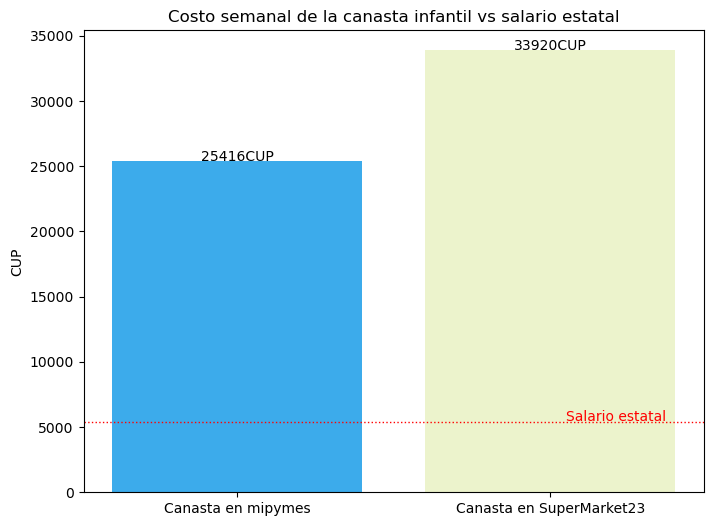

In [4]:

costo_canasta_mipymes = utils.costo_total_canasta(canasta,precio_mediano_mipymes )
costo_canasta_tienda_online = utils.costo_total_canasta(canasta,precio_mediano_tienda_online)
utils.visuzalizar_canastas_vs_salario(costo_canasta_mipymes, costo_canasta_tienda_online, salario_medio)

## La anatomía del gasto: ¿En qué se gasta realmente el dinero durante una hospitalización?
Este segundo gráfico responde a una pregunta crucial: cuando una familia debe desembolsar más de 26000 CUP en una semana, ¿en qué productos específicamente se concentra ese gasto? La visualización desglosa la canasta por categorías, revelando patrones de consumo y prioridades económicas forzadas por la emergencia médica.
Una parte se destina a manetener condiciones básicas de higiene para prevenir infecciones. Esto no es un lujo, sino una necesidad médica fundamental en un entorno hospitalario. Otra parte del presupuesto se va en alimentos especializados, muchos de los cuales son necesarios para administrar medicamentos. La consecuencia es desoladora: el salario mensual no alcanza ni para cubrir el consumo de carne, alimento de alta densidad nutricional, crucial en esta etapa de rápido crecimiento y desarrollo. Esto significa que, frente a la emergencia, las familias no eligen entre marcas caras o baratas, sino que son forzadas a un "triaje económico" desgarrador: decidir qué aspecto fundamental del cuidado—la higiene, la alimentación adecuada o los medicamentos complementarios—van a recortar porque el dinero simplemente no alcanza. La hospitalización, por tanto, impone una doble carga: la angustia por la salud del niño y la matemática cruel de un presupuesto imposible.

In [5]:
costos_totales = utils.calcular_costos_totales_por_categoria_canasta(canasta, precio_mediano_mipymes)
utils.visualizar_costo_total_canasta(canasta, costos_totales)

## Disponibilidad de productos de la cansta básica hospitalaria

En el análisis de disponibilidad en las MIPYMES muestra un mercado con provisiones dispares. La mayoría de los productos considerados esenciales para un paciente pediátrico no muestran una presencia significativa en los establecimientos. Artículos como las compotas son los que aparecen con menor frecuencia en los estantes.
Esta distribución de la oferta sugiere que, dentro la lógica del mercado minorista, existe una priorización de ciertos bienes sobre otros.

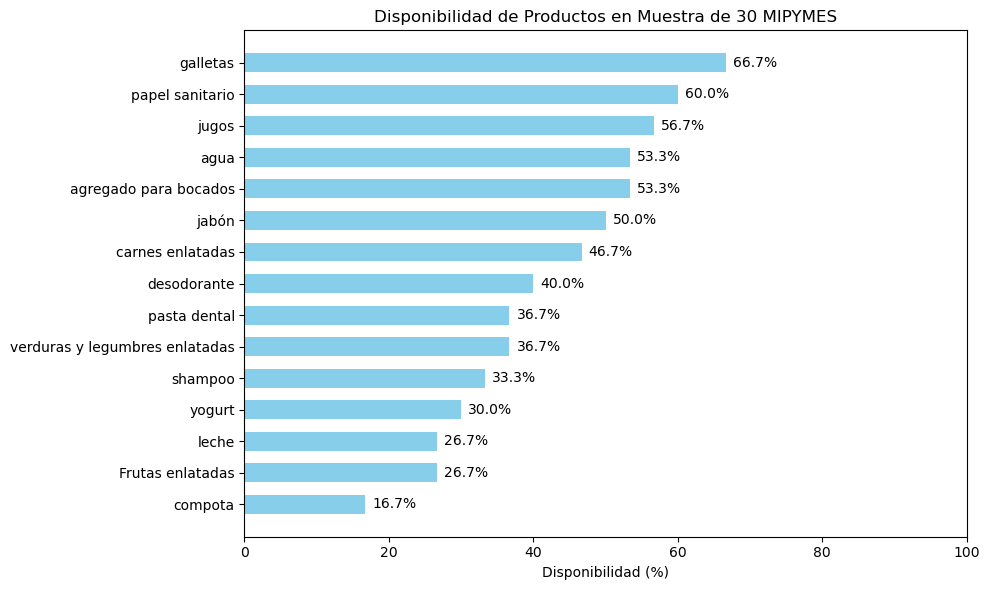

In [6]:
conteo_de_disponibiliad = utils.conteo_disponibilidad_categorias(stores)
utils.visualizar_disponibilidad(conteo_de_disponibiliad, len_de_muestra)


## Dependencia importadora de la canasta 
Este gráfico revela una realidad estructural decisiva: la abrumadora mayoría de los productos considerados esenciales para una hospitalización pediátrica son importados.
Solo en contadas excepciones, como algunos lácteos o el agua embotellada, existe una presencia significativa de producción nacional, aunque incluso allí, como en el caso del yogurt, más de la mitad del producto disponible llega del extranjero.
En pocas palabras: cuando una familia paga alrededor de 30000 CUP por una semana de productos, en realidad está pagando en dólares, pero con pesos. Esto explica por qué el salario en CUP no alcanza: porque la canasta básica de un niño enfermo no se produce aquí, sino que se “importa” por cada familia, a un precio que sigue la lógica de las divisas, no de la economía local.

In [7]:

utils.vizualizar_origen_de_productos_por_categoria(origen_categorias)

## ¿Es más caro cerca del hospital el jugo?

Un mito común en situaciones de emergencia es que los comercios más cercanos a un centro de salud aprovechan la desesperación para subir precios. Sin embargo, los datos revelan una realidad distinta: no existe una correlación entre la distancia al hospital y el precio de los jugos. En las MIPYMES muestreadas, el precio de una caja de 200ml se mantiene en un rango estrecho (152-300 CUP), independientemente de si el establecimiento está a una cuadra o a más de 1 kilómetro del hospital.

Esto sugiere que el mercado de este producto esencial tiene una dinámica propia, donde la competencia entre vendedores y la conciencia de los consumidores establece un "precio de referencia" que se respeta en toda el área. Para las familias, esta es una pequeña certeza en medio del caos: no necesitan emprender una búsqueda exhaustiva por la ciudad para evitar el "impuesto por desesperación". Pueden adquirir los jugos —esenciales para administrar medicamentos— en cualquier comercio cercano, ahorrando un recurso aún más valioso que el dinero: el tiempo y la energía física y emocional.

Este hallazgo, aunque aparentemente sencillo, es significativo. Muestra que, al menos en este producto crítico, la lógica del mercado funciona con cierta transparencia y equidad geográfica. No elimina el problema del alto costo general (sigue siendo inaccesible con un salario promedio), pero sí descarta la especulación basada en la ubicación.

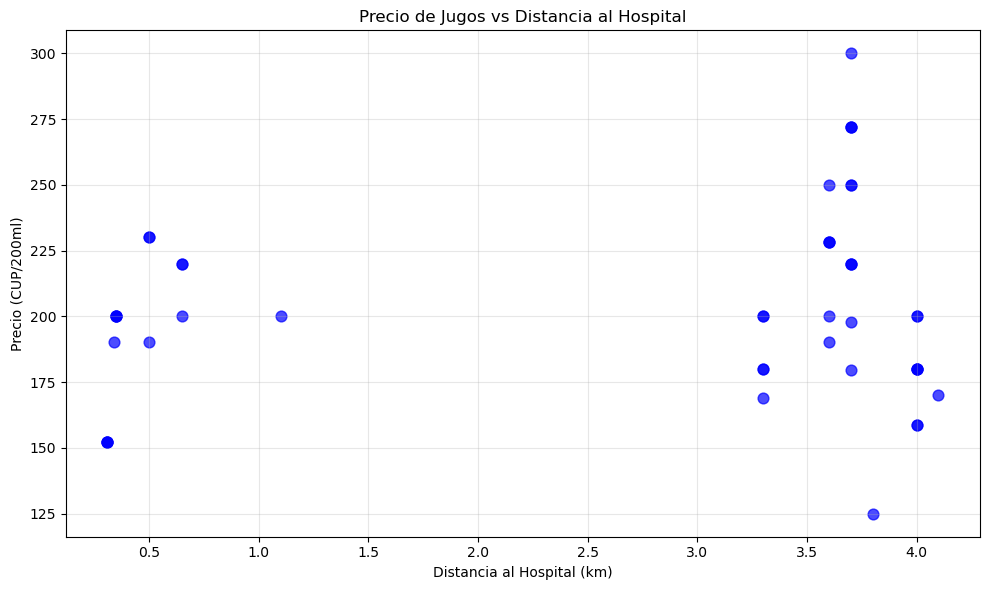

In [8]:
utils.visualizar_distancia_vs_precios_jugos(jugos_estandarizados)